screenshot taken
Escape hit, closing....


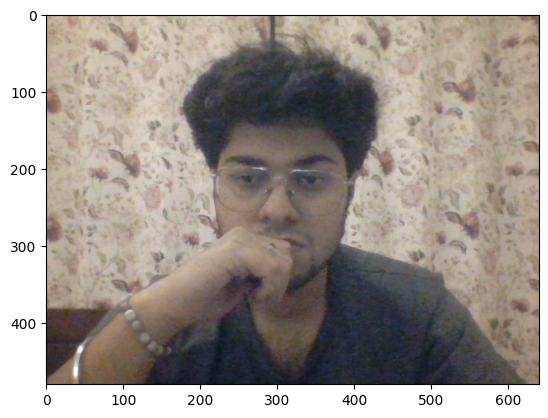

Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]


[{'emotion': {'angry': 44.68401340746959, 'disgust': 0.00016013345702459104, 'fear': 14.62749329969247, 'happy': 1.4285338031371715, 'sad': 16.965972898362452, 'surprise': 3.3531015874804013, 'neutral': 18.940724071307425}, 'dominant_emotion': 'angry', 'region': {'x': 211, 'y': 140, 'w': 191, 'h': 191}}]
angry
Current Time = 01:00:54
In 36 Seconds WhatsApp will open and after 15 Seconds Message will be Delivered!


In [4]:
import cv2
import pyttsx3
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

cam= cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0
while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)
    k= cv2.waitKey(1)
    if k%256 == 27:
        print("Escape hit, closing....")
        break
    elif k%256 == 32:
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name,frame)
        print("screenshot taken")
        img_counter+=1
cam.release()

img1=cv2.imread(r'C:\Users\akars\Desktop\6th sem\MINOR PROJECT\DEEPFACE\opencv_frame_0.png')
plt.imshow(img1[:,:,::-1])
plt.show()
result=DeepFace.analyze(img1, actions = ['emotion'])
print(result)
for i in result:
    final=i['dominant_emotion']
    print(i['dominant_emotion'])

engine= pyttsx3.init()
if final=='angry' or final=='disgust' or final=='fear' or final=='sad':
    engine.say("Your are in stress. Please seek some help")
    engine.say("Want to tell this to one of your family member?")
    engine.runAndWait()
    ans=input("Yes or No?")
    if ans=="Yes" or ans=="yes" or ans=="y" or ans=="Y":
        from datetime import datetime
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time =", current_time)
        l1=current_time.split(":")
        h=int(l1[0])
        min=int(l1[1])+2
        import pywhatkit
        num=input("Enter your preferred family member's mobile number")
        num_final="+91"+num
        name=input("Enter your name please")
        msg=name+" is in a bit stressful conditon. Please take care of your family member"
        print("Meanwhile, we send your message, here are some remedies you can try by yourself to reduce stress.")
        engine.say("Meanwhile, we send your message, here are some remedies you can try by yourself to reduce stress.")
        engine.runAndWait()
        import webbrowser
        url = "https://www.healthline.com/nutrition/16-ways-relieve-stress-anxiety"
        webbrowser.open(url)
        pywhatkit.sendwhatmsg(num_final, msg, h, min) 
else:
    engine.say("You are not in stress. Enjoy your life peacefully")
    engine.runAndWait()

 



